# Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

## Loading important libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.layers import *
from keras.models import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [98]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as z:
    z.extractall() 

Repeat the same step for test.zip

In [99]:
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as z:
    z.extractall()

Repeat the same step for sample_submission.csv.zip

In [100]:
from zipfile import ZipFile
with ZipFile('sample_submission.csv.zip', 'r') as z:
    z.extractall()

Repeat the same step for labels.csv.zip

In [101]:
from zipfile import ZipFile
with ZipFile('labels.csv.zip', 'r') as z:
    z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [102]:
labels_df=pd.read_csv('labels.csv',header=0)

In [103]:
labels_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


### Print the count of each category of Dogs given in the dataset



In [104]:
print(labels_df['breed'].value_counts())

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64


In [105]:
np.unique(labels_df['breed'])

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [106]:
num_classes=len(np.unique(labels_df['breed']))

In [107]:
print('Number of Dogs breeds in Train set:->',num_classes)

Number of Dogs breeds in Train set:-> 120


### Get one-hot encodings of labels

In [108]:
y_train_data = pd.get_dummies(labels_df['breed'])

In [109]:
y_train_data=pd.concat([labels_df,y_train_data],axis=1)

In [110]:
y_train_data.shape

(10222, 122)

In [111]:
y_train_data


,id,breed,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001cdf01b096e06d78e9e5112d419397,pekinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y_train_data=y_train_data.drop(['id','breed'],axis=1)

In [113]:
y_train_data

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10219,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
import cv2
from tqdm import tqdm

In [115]:
img_rows=128
img_cols=128
num_channels=3

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [116]:
label=pd.read_csv('labels.csv',header=0)

In [117]:
label

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [118]:
x_feature=[]
y_feature=[]

for f,img in tqdm(label.values): # f for format,jpg
#for f,img in tqdm(label.values): # f for format,jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img,(img_rows, img_cols))
    x_feature.append(train_img_resize)
    y_feature.append(img)

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [01:23<00:00, 122.97it/s]


In [119]:
y_feature[20]

'doberman'

In [120]:
label.iloc[20,1]

'doberman'

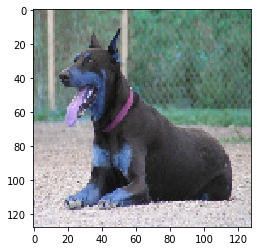

In [121]:
plt.imshow(x_feature[20])

In [122]:
x_feature

[array([[[ 69, 116, 173],
         [ 38,  91, 136],
         [102, 166, 204],
         ...,
         [130, 204, 237],
         [ 85, 193, 220],
         [ 59, 138, 170]],
 
        [[ 42,  77, 118],
         [142, 180, 216],
         [119, 162, 197],
         ...,
         [ 80, 152, 194],
         [101, 183, 218],
         [ 74, 177, 212]],
 
        [[ 65, 107, 151],
         [ 57, 103, 147],
         [ 66, 107, 153],
         ...,
         [ 37, 121, 172],
         [ 73, 145, 183],
         [ 64, 168, 207]],
 
        ...,
 
        [[ 77, 119, 190],
         [ 66, 121, 186],
         [ 66, 122, 183],
         ...,
         [ 70,  91, 159],
         [ 59,  89, 154],
         [ 91, 132, 184]],
 
        [[ 65, 118, 185],
         [ 72, 124, 190],
         [ 74, 125, 187],
         ...,
         [ 54,  63, 132],
         [ 74, 116, 169],
         [121, 169, 223]],
 
        [[ 63, 116, 183],
         [ 73, 125, 191],
         [ 76, 127, 190],
         ...,
         [ 50,  51, 127],
  

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [123]:
x_train_data=np.array(x_feature)

In [124]:
x_train_data.shape

(10222, 128, 128, 3)

In [125]:
x_train_data = x_train_data.astype('float32')
x_train_data /= 255

print('--- THE DATA ---')
print('x_train_data shape:', x_train_data.shape)
print(x_train_data.shape[0], 'train samples')


--- THE DATA ---
x_train_data shape: (10222, 128, 128, 3)
10222 train samples


In [126]:
y_train_data=np.array(y_train_data)

In [127]:
print('--- THE DATA ---')
print('y_train_data shape:', y_train_data.shape)
print(y_train_data.shape[0], 'train labels')

--- THE DATA ---
y_train_data shape: (10222, 120)
10222 train labels


In [128]:
y_train_data.dtype

dtype('uint8')

In [129]:
y_train_data=y_train_data.astype('float32')

In [130]:
y_train_data.dtype

dtype('float32')

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [131]:
x_train = x_train_data[0:5000]
y_train = y_train_data[0:5000]

In [132]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('y_train shape:', y_train.shape)
print(y_train.shape[0], 'train labels')

x_train shape: (5000, 128, 128, 3)
5000 train samples
y_train shape: (5000, 120)
5000 train labels


In [133]:
x_val = x_train_data[5000:7000]
y_val = y_train_data[5000:7000]
x_test = x_train_data[7000:]
y_test = y_train_data[7000:]

In [134]:
print('x_val shape:', x_val.shape)
print(x_val.shape[0], 'validation samples')
print('y_val shape:', y_val.shape)
print(y_val.shape[0], 'validation labels')

x_val shape: (2000, 128, 128, 3)
2000 validation samples
y_val shape: (2000, 120)
2000 validation labels


In [135]:
input_shape = (img_rows, img_cols, num_channels)
print('Shape of the input:', input_shape)

Shape of the input: (128, 128, 3)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [136]:
test_df=pd.read_csv('sample_submission.csv',header=0)

In [137]:
test_img=test_df['id']

Run the below code to load the test image files in x_test_feature

In [138]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols),num_channels) 
    x_test_feature.append(img_resize)

100%|███████████████████████████████████████████████████████████████████████████| 10357/10357 [01:42<00:00, 101.02it/s]


Normalize the test data and convert it into 4 dimensions

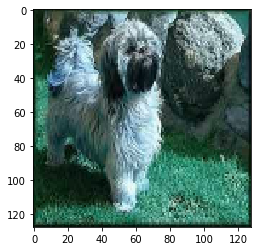

In [139]:
plt.imshow(x_test_feature[4])

In [140]:
x_pred_data=x_test_feature

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [141]:
from keras.layers import BatchNormalization

In [142]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 5X5 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization(momentum=0.0))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization(momentum=0.0))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

In [143]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)            

In [144]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [145]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])

### Use batch_size = 128 and epochs = 10 and execute the model

In [146]:
#Training on the dataset
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,verbose=2,
          validation_data=(x_val, y_val))

Train on 5000 samples, validate on 2000 samples
Epoch 1/10
 - 135s - loss: 5.1041 - accuracy: 0.0204 - val_loss: 5.2839 - val_accuracy: 0.0270
Epoch 2/10
 - 119s - loss: 4.0409 - accuracy: 0.1244 - val_loss: 5.1453 - val_accuracy: 0.0340
Epoch 3/10
 - 119s - loss: 2.4035 - accuracy: 0.5020 - val_loss: 11.8527 - val_accuracy: 0.0245
Epoch 4/10
 - 120s - loss: 0.8054 - accuracy: 0.9090 - val_loss: 7.4956 - val_accuracy: 0.0370
Epoch 5/10
 - 119s - loss: 0.2249 - accuracy: 0.9906 - val_loss: 14.5990 - val_accuracy: 0.0295
Epoch 6/10
 - 119s - loss: 0.0760 - accuracy: 0.9996 - val_loss: 15.0372 - val_accuracy: 0.0225
Epoch 7/10
 - 119s - loss: 0.0461 - accuracy: 0.9996 - val_loss: 9.8529 - val_accuracy: 0.0290
Epoch 8/10
 - 118s - loss: 0.0316 - accuracy: 0.9996 - val_loss: 6.4096 - val_accuracy: 0.0390
Epoch 9/10
 - 118s - loss: 0.0193 - accuracy: 0.9996 - val_loss: 24.1740 - val_accuracy: 0.0205
Epoch 10/10
 - 118s - loss: 0.0175 - accuracy: 0.9994 - val_loss: 5.7939 - val_accuracy: 0.03

In [147]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)

3222/3222 [==============================] - 36s 11ms/step


In [148]:
print('Test accuracy:', score[1])

Test accuracy: 0.031346987932920456


In [149]:
print('Test loss:', score[0])

Test loss: 5.921397238470322


#### The model accuracy is as poor as 3% because of # of epochs used and the image size is ont 128 x128 whereas most of the images are of resolution starting from 230 to 600 pixels.

#The model accuracy is very poor !!!!

##### Use Data Augmentation in the above model to see if the accuracy improves


In [150]:
from keras.preprocessing.image import ImageDataGenerator
    

In [151]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode='nearest')  # randomly flip images

# Prepare the generator
#datagen.fit(x_train)



In [152]:
validation_datagen = ImageDataGenerator(rescale=1./255)

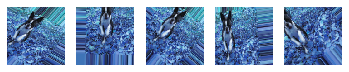

In [153]:
from matplotlib import pyplot as plt
gen = train_datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [154]:
train_generator = train_datagen.flow(x_train,
        y_train,
        batch_size=128)


In [155]:
val_generator=validation_datagen.flow(x_val,y_val,batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [156]:
model.fit_generator(
        train_generator,verbose=2,
#        steps_per_epoch=2000,
        epochs=10,
        validation_data=val_generator)
        #validation_steps=800)

Epoch 1/10
 - 126s - loss: 5.0777 - accuracy: 0.0254 - val_loss: 8.0744 - val_accuracy: 0.0110
Epoch 2/10
 - 124s - loss: 4.7866 - accuracy: 0.0334 - val_loss: 8.0150 - val_accuracy: 0.0065
Epoch 3/10
 - 124s - loss: 4.6483 - accuracy: 0.0406 - val_loss: 7.6449 - val_accuracy: 0.0110
Epoch 4/10
 - 122s - loss: 4.4949 - accuracy: 0.0530 - val_loss: 8.1123 - val_accuracy: 0.0060
Epoch 5/10
 - 123s - loss: 4.4477 - accuracy: 0.0476 - val_loss: 8.8538 - val_accuracy: 0.0070
Epoch 6/10
 - 123s - loss: 4.3918 - accuracy: 0.0524 - val_loss: 9.1680 - val_accuracy: 0.0100
Epoch 7/10
 - 123s - loss: 4.3249 - accuracy: 0.0684 - val_loss: 8.2530 - val_accuracy: 0.0070
Epoch 8/10
 - 124s - loss: 4.3144 - accuracy: 0.0722 - val_loss: 7.9026 - val_accuracy: 0.0070
Epoch 9/10
 - 124s - loss: 4.2308 - accuracy: 0.0814 - val_loss: 9.3456 - val_accuracy: 0.0085
Epoch 10/10
 - 124s - loss: 4.2050 - accuracy: 0.0720 - val_loss: 11.5435 - val_accuracy: 0.0070


In [205]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow(x_test,
        y_test,
        batch_size=128)

test_Loss,test_Acc=model.evaluate_generator(test_generator,steps=23)
print('test Accuracy:',test_Acc)

test Accuracy: 0.0078125


### The accuracy of augmented model is very bad too. 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [161]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
IMAGE_SIZE = [128, 128]
base_model= VGG16(input_shape = IMAGE_SIZE + [3],weights=('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
#                include_top=False, pooling='avg')
                 include_top=False)

Print the summary of the base_model

In [162]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [171]:
top_model = Sequential()
top_model.add(base_model)
top_model.add(Flatten())
top_model.add(Dense(1024, activation='relu'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.2))
top_model.add(Dense(256, activation='relu'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.2))
top_model.add(Dense(num_classes, activation='softmax'))



### Make all the layers in the base_model (VGG16) to be non-trainable

In [172]:
i=0
for layer in base_model.layers:
    layer.trainable = False
    i = i+1
    print(i,layer.name)

1 input_1
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool


In [173]:
top_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)              

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [175]:
from keras.optimizers import adam
top_model.compile(loss=categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.001,
                              patience=2, min_lr=0.001)
callback_list = [reduce_lr]

In [176]:
top_model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_val, y_val), callbacks=callback_list,verbose=2)

Train on 5000 samples, validate on 2000 samples
Epoch 1/10
 - 623s - loss: 4.6895 - accuracy: 0.0590 - val_loss: 6.9608 - val_accuracy: 0.0340
Epoch 2/10
 - 620s - loss: 2.8690 - accuracy: 0.3384 - val_loss: 4.7610 - val_accuracy: 0.0730
Epoch 3/10
 - 622s - loss: 1.9831 - accuracy: 0.5616 - val_loss: 4.0214 - val_accuracy: 0.1365
Epoch 4/10
 - 623s - loss: 1.2754 - accuracy: 0.7654 - val_loss: 3.9625 - val_accuracy: 0.1410
Epoch 5/10
 - 612s - loss: 0.8276 - accuracy: 0.8708 - val_loss: 3.9131 - val_accuracy: 0.1695
Epoch 6/10
 - 610s - loss: 0.5540 - accuracy: 0.9234 - val_loss: 4.1007 - val_accuracy: 0.1600
Epoch 7/10
 - 612s - loss: 0.3772 - accuracy: 0.9604 - val_loss: 3.9825 - val_accuracy: 0.1600
Epoch 8/10
 - 609s - loss: 0.2732 - accuracy: 0.9742 - val_loss: 4.1560 - val_accuracy: 0.1580
Epoch 9/10
 - 611s - loss: 0.2281 - accuracy: 0.9790 - val_loss: 4.0552 - val_accuracy: 0.1840
Epoch 10/10
 - 616s - loss: 0.1352 - accuracy: 0.9912 - val_loss: 4.2341 - val_accuracy: 0.1575


In [177]:
scorevgg16b = top_model.evaluate(x_test, y_test)

3222/3222 [==============================] - 293s 91ms/step


In [178]:
print('Test accuracy:', scorevgg16b[1])

Test accuracy: 0.1759776473045349


In [179]:
print('Test loss:', scorevgg16b[0])

Test loss: 4.123160756796062


### Test accuracy has jumped from 3% to 17.5% by using pretrained VGG16 convolution base features. But the model is highly overfitting as train accuracy is 99% but validation accuracy  is only 16%. Test accuracy could have been better has the image size been more than 128 and epochs were close to 100.

### Feature Extraction with data Augmentation

In [180]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    fill_mode='nearest')  # randomly flip images

In [181]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train,
        y_train,
        batch_size=128)

val_generator=validation_datagen.flow(x_val,y_val,batch_size=128)

In [182]:
top_model.fit_generator(
        train_generator,verbose=2,
        epochs=10,
        validation_data=val_generator)

Epoch 1/10
 - 617s - loss: 4.0956 - accuracy: 0.1526 - val_loss: 10.2509 - val_accuracy: 0.0075
Epoch 2/10
 - 623s - loss: 3.5932 - accuracy: 0.1882 - val_loss: 6.5807 - val_accuracy: 0.0095
Epoch 3/10
 - 617s - loss: 3.3868 - accuracy: 0.2106 - val_loss: 6.1052 - val_accuracy: 0.0095
Epoch 4/10
 - 617s - loss: 3.2385 - accuracy: 0.2298 - val_loss: 6.0683 - val_accuracy: 0.0060
Epoch 5/10
 - 615s - loss: 3.0746 - accuracy: 0.2620 - val_loss: 6.0508 - val_accuracy: 0.0095
Epoch 6/10
 - 611s - loss: 3.0297 - accuracy: 0.2622 - val_loss: 6.9826 - val_accuracy: 0.0095
Epoch 7/10
 - 605s - loss: 2.9410 - accuracy: 0.2762 - val_loss: 6.0214 - val_accuracy: 0.0095
Epoch 8/10
 - 604s - loss: 2.9316 - accuracy: 0.2858 - val_loss: 6.2358 - val_accuracy: 0.0095
Epoch 9/10
 - 606s - loss: 2.7414 - accuracy: 0.3178 - val_loss: 6.3660 - val_accuracy: 0.0095
Epoch 10/10
 - 611s - loss: 2.7714 - accuracy: 0.3058 - val_loss: 6.3646 - val_accuracy: 0.0095


In [187]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [189]:
test_generator=test_datagen.flow(x_test,
        y_test,
        batch_size=128)

In [203]:
test_loss,test_acc=top_model.evaluate_generator(test_generator,steps=23)

In [204]:
print('test acc:',test_acc)

test acc: 0.0074728261679410934


#### The test accuracy has got worse than the top model without augmentation. Also the train accuracy and validation accuracy has huge gap which can indicate overffiting.

### Predictions

In [215]:
pred_test=top_model.predict(x_test)

In [216]:
for i in range(1,(x_test.shape[0] + 1)):
    pred_test[i-1] = np.argmax(pred_test[i-1])
pred_test_labels=pred_test[:,1]

In [217]:
print(pred_test_labels.shape)
print(pred_test_labels)

(3222,)
[59. 20. 42. ... 28. 38. 74.]


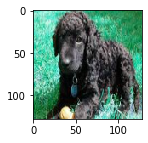

Peredicted Labels: 20.0
True lable: 34


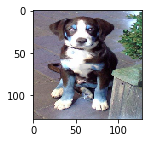

Peredicted Labels: 42.0
True lable: 42


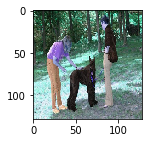

Peredicted Labels: 104.0
True lable: 48


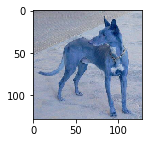

Peredicted Labels: 55.0
True lable: 55


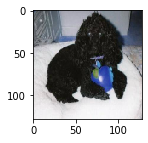

Peredicted Labels: 54.0
True lable: 76


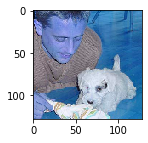

Peredicted Labels: 47.0
True lable: 98


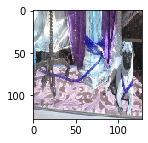

Peredicted Labels: 55.0
True lable: 88


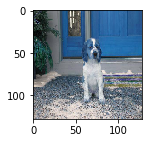

Peredicted Labels: 113.0
True lable: 115


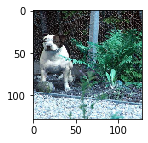

Peredicted Labels: 55.0
True lable: 104


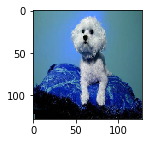

Peredicted Labels: 110.0
True lable: 100


In [239]:
for i in range(1, 10 +1):
  plt.figure(figsize=(2,2))
  plt.imshow(x_test[i],cmap="gray")
  plt.show()
  print('Peredicted Labels:',pred_test_labels[i])
  print('True lable:',y_labels[i])

### Classification Matrix

In [218]:
from sklearn.metrics import classification_report

In [222]:
pred_test_labels.shape

(3222,)

In [236]:
y_label=labels_df['breed']
y_label=y_label[7000:]

In [237]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_labels=le.fit_transform(y_label)

In [238]:
print(classification_report(y_labels, pred_test_labels))

              precision    recall  f1-score   support

           0       0.35      0.36      0.35        25
           1       0.20      0.42      0.27        33
           2       0.78      0.25      0.38        28
           3       0.22      0.16      0.19        37
           4       0.21      0.25      0.23        28
           5       0.50      0.04      0.08        23
           6       0.38      0.47      0.42        30
           7       0.14      0.14      0.14        43
           8       0.25      0.07      0.11        27
           9       0.56      0.16      0.24        32
          10       0.26      0.48      0.34        21
          11       0.67      0.21      0.31        39
          12       0.60      0.12      0.21        24
          13       0.71      0.17      0.28        29
          14       0.07      0.16      0.10        19
          15       0.12      0.12      0.12        34
          16       0.13      0.29      0.18        14
          17       0.17    